# 3 数据集Wine Reviews分析

## 3.1 概述

在数据集中采用更新版本v2进行分析，该数据集共有129971条数据，13项属性标签，分别是：

* country：葡萄酒产出国
* description：侍酒师对葡萄酒风味的描述
* designation：葡萄园（酿酒厂指定的葡萄来源）
* points：《Wine Enthusiast Magazine》对葡萄酒的评分（1-100分）
* price：一瓶酒的价格
* province：葡萄酒来自的省或州
* region_1：省或州的葡萄种植产区
* region_2：葡萄种植产区内更特定的划分区域
* taster_name：品酒师姓名
* taster_twitter_handle：品酒师的Twitter账号
* title：葡萄酒评论的标题
* variety：葡萄品种
* winery：酿酒厂

## 3.2 导入&预览数据

数据分析工具：

* Numpy
* Pandas

可视化工具：

* Matplotlib

In [1]:
# 导入要引的包
import os
import sys
import math
import pandas as pd
import numpy as np
import csv
import json
import pickle
import matplotlib.pyplot as plt
# 内嵌画图
%matplotlib inline

导入并预览前几条数据。数据位于 data/WineReviews/winemag-data-130k-v2.csv 这个CSV文件中，使用Pandas库中的read_csv()方法将CSV文件的内容加载到Pandas DataFrame()对象中。

In [2]:
wine_data = pd.read_csv('.\data\WineReviews\winemag-data-130k-v2.csv', sep=",", index_col = 0)
wine_data.head(5)

,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery
0,Italy,"Aromas include tropical fruit, broom, brimston...",Vulkà Bianco,87,NaN,Sicily & Sardinia,Etna,NaN,Kerin O’Keefe,@kerinokeefe,Nicosia 2013 Vulkà Bianco (Etna),White Blend,Nicosia
1,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87,15.0,Douro,NaN,NaN,Roger Voss,@vossroger,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos
2,US,"Tart and snappy, the flavors of lime flesh and...",NaN,87,14.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris,Rainstorm
3,US,"Pineapple rind, lemon pith and orange blossom ...",Reserve Late Harvest,87,13.0,Michigan,Lake Michigan Shore,NaN,Alexander Peartree,NaN,St. Julian 2013 Reserve Late Harvest Riesling ...,Riesling,St. Julian
4,US,"Much like the regular bottling from 2012, this...",Vintner's Reserve Wild Child Block,87,65.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,Pinot Noir,Sweet Cheeks


查询数据记录的大小，显示由已加载数据的行、列组成的元组。

In [3]:
# dataFrame shape
wine_data.shape

(129971, 13)

### 3.2.1 数据类型统计

统计内容：列名 | 计数 | 空值 | 数据类型

In [4]:
wine_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 129971 entries, 0 to 129970
Data columns (total 13 columns):
country                  129908 non-null object
description              129971 non-null object
designation              92506 non-null object
points                   129971 non-null int64
price                    120975 non-null float64
province                 129908 non-null object
region_1                 108724 non-null object
region_2                 50511 non-null object
taster_name              103727 non-null object
taster_twitter_handle    98758 non-null object
title                    129971 non-null object
variety                  129970 non-null object
winery                   129971 non-null object
dtypes: float64(1), int64(1), object(11)
memory usage: 13.9+ MB


查看具有空值的属性统计，允许Designation, Region_1, Region_2, Taster_name, Taster_twitter_handle有空值，但之后应当处理丢失的Prices和Country记录。

## 3.3 数据摘要与可视化

### 3.3.1 数据摘要

#### 3.3.1.1 标称属性统计频数

标称属性包括：Country，Designation，Province，Region_1，Region_2，Taster_name，Taster_twitter_handle，Variety，Winery

对字符串类型的属性返回的结果描述：

* count：列中值的总数
* unique：列中唯一值的计数
* top：列中重复次数最多的值
* freq：列中顶部重复的次数

In [5]:
wine_data["country"].describe()

count     129908
unique        43
top           US
freq       54504
Name: country, dtype: object

In [6]:
wine_data["designation"].describe()

count       92506
unique      37979
top       Reserve
freq         2009
Name: designation, dtype: object

In [7]:
wine_data["province"].describe()

count         129908
unique           425
top       California
freq           36247
Name: province, dtype: object

In [8]:
wine_data["region_1"].describe()

count          108724
unique           1229
top       Napa Valley
freq             4480
Name: region_1, dtype: object

In [9]:
wine_data["region_2"].describe()

count             50511
unique               17
top       Central Coast
freq              11065
Name: region_2, dtype: object

In [10]:
wine_data["taster_name"].describe()

count         103727
unique            19
top       Roger Voss
freq           25514
Name: taster_name, dtype: object

In [11]:
wine_data["taster_twitter_handle"].describe()

count          98758
unique            15
top       @vossroger
freq           25514
Name: taster_twitter_handle, dtype: object

In [12]:
wine_data["title"].describe()

count                                                129971
unique                                               118840
top       Gloria Ferrer NV Sonoma Brut Sparkling (Sonoma...
freq                                                     11
Name: title, dtype: object

In [13]:
wine_data["variety"].describe()

count         129970
unique           707
top       Pinot Noir
freq           13272
Name: variety, dtype: object

In [14]:
wine_data["winery"].describe()

count                 129971
unique                 16757
top       Wines & Winemakers
freq                     222
Name: winery, dtype: object

给出每个可能取值的频数，各属性之间以下划线隔开。

In [15]:
# 总览
nom_attribute = ['country','designation','province','region_1','region_2','taster_name','taster_twitter_handle','variety','winery']
for tmp in nom_attribute:
    print(wine_data[tmp].value_counts())
    print('-' * 60)

US                        54504
France                    22093
Italy                     19540
Spain                      6645
Portugal                   5691
Chile                      4472
Argentina                  3800
Austria                    3345
Australia                  2329
Germany                    2165
New Zealand                1419
South Africa               1401
Israel                      505
Greece                      466
Canada                      257
Hungary                     146
Bulgaria                    141
Romania                     120
Uruguay                     109
Turkey                       90
Slovenia                     87
Georgia                      86
England                      74
Croatia                      73
Mexico                       70
Moldova                      59
Brazil                       52
Lebanon                      35
Morocco                      28
Peru                         16
Ukraine                      14
Macedoni

从以上内容可以关注到，在该数据集中：

* 葡萄酒产出地中，美国加州占了很大比重。（这有悖于法国和意大利是葡萄酒天堂的常识，也许是因为美国人收集了很多国内的数据集）
* 出现最多的酿酒厂名为Wines & Winemakers
* 品酒最多的品酒师名为Roger Voss，他的Twitter账号是@vossroger

#### 3.3.1.2 数值属性计算五数概括和缺失值

数值属性有：Points和Price，对数值类型的属性返回的结果描述：

* count：列中值的总数
* mean：列中唯一值的计数
* std：该列中重复次数最多的值
* min：列中最小值
* 25%：第一个四分位数的值
* 50%：第二个四分位数的值
* 75%：第三个四分位数的值
* max：列中的最大值

In [16]:
wine_data["points"].describe()

count    129971.000000
mean         88.447138
std           3.039730
min          80.000000
25%          86.000000
50%          88.000000
75%          91.000000
max         100.000000
Name: points, dtype: float64

In [17]:
wine_data["price"].describe()

count    120975.000000
mean         35.363389
std          41.022218
min           4.000000
25%          17.000000
50%          25.000000
75%          42.000000
max        3300.000000
Name: price, dtype: float64

数值数据包括：Points，Price；五数概括分别如下：
* Points：最大值100，最小值80，Q1值86，中位数88，Q3值91
* Price：最大值3300，最小值4，Q1值17，中位数25，Q3值42

### 3.3.2 数据可视化

首先对于Points属性进行可视化，检查数据分布和离群点。

In [18]:
from scipy import stats
from pandas.core import datetools
from ipykernel import kernelapp as app
import statsmodels.api as sm

D:\tools\Anaconda\lib\site-packages\ipykernel\__main__.py:2: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from ipykernel import kernelapp as app


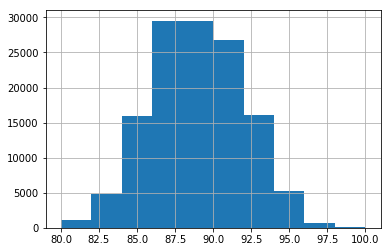

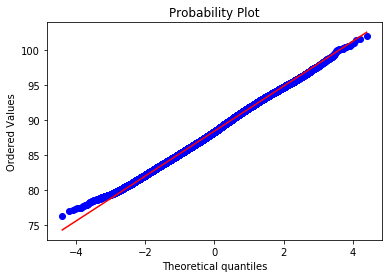

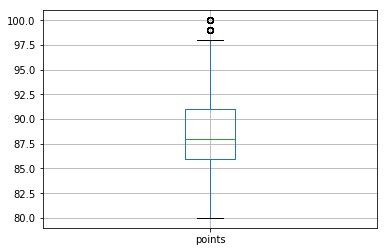

In [19]:
wine_data['points'].hist()

points = wine_data['points'].dropna()
points = points.apply(lambda x: x + np.random.normal())

fig = plt.figure()
res = stats.probplot(points, plot=plt)
plt.show()

wine_data.boxplot(column=['points'])

发现有较少的离群点，拟合时基本符合正态分布。

其次再对于Price属性进行可视化。

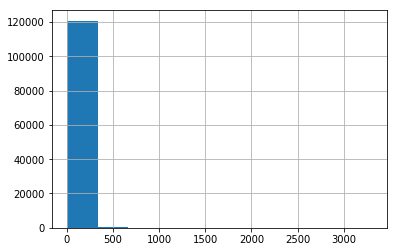

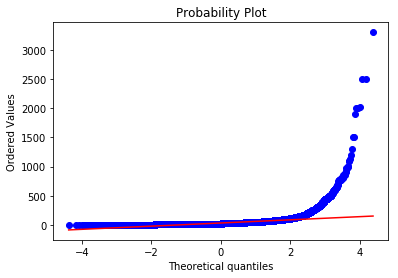

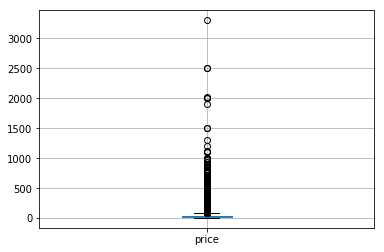

In [20]:
wine_data['price'].hist()

price = wine_data['price'].dropna()
price = price.apply(lambda x: x + np.random.normal())

fig = plt.figure()
res = stats.probplot(price, plot=plt)
plt.show()

wine_data.boxplot(column=['price'])

从图中可以观察到，酒的价格多集中在低价区域，存在着较多的离群点，但仍基本符合正态分布。

接下来可以绘图查看每个国家的葡萄酒均价：

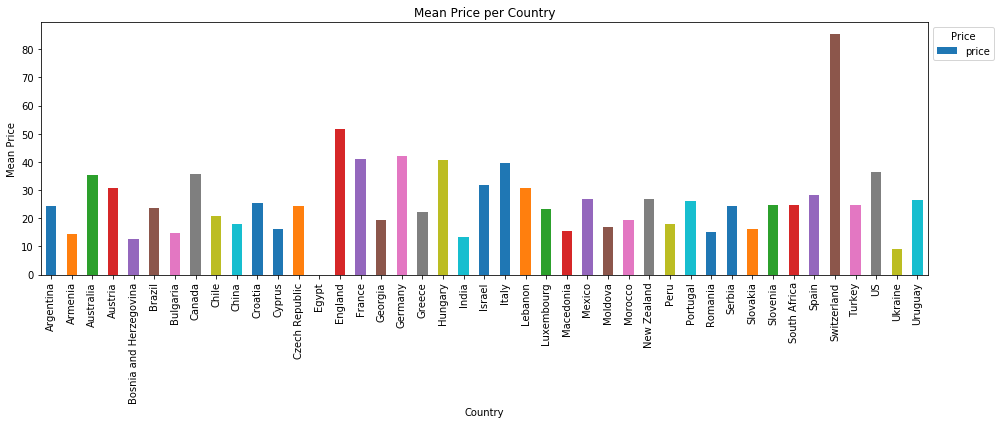

In [21]:
fig, ax = plt.subplots(figsize=(14, 6))

wine_data.groupby(wine_data['country'])['price'].mean().plot.bar()
mean_price = wine_data["price"].mean(0)
wine_data["price"].fillna(mean_price)

ax.set_xlabel('Country')
ax.set_ylabel('Mean Price')

ax.set_title("Mean Price per Country")
ax.legend(bbox_to_anchor=(1, 1), loc=2, title='Price')

fig.tight_layout()

## 3.4 数据缺失处理

### 3.4.1 总览数据缺失

接下来处理NaN和np.null的值，且计算缺失的百分比。

首先，查看列的缺失数据。（存在缺失为True）

In [22]:
wine_data.isnull().any()

country                   True
description              False
designation               True
points                   False
price                     True
province                  True
region_1                  True
region_2                  True
taster_name               True
taster_twitter_handle     True
title                    False
variety                   True
winery                   False
dtype: bool

以下这些列存在数据缺失：

* country
* designation
* price
* province
* region_1
* region_2
* taster_name
* taster_twitter_handle
* variety

接下来观察每个列中缺失值的总和。

In [23]:
wine_data.isnull().sum()

country                     63
description                  0
designation              37465
points                       0
price                     8996
province                    63
region_1                 21247
region_2                 79460
taster_name              26244
taster_twitter_handle    31213
title                        0
variety                      1
winery                       0
dtype: int64

在这些列中，需要处理丢失的Country和Price记录，其他的列可以允许存在缺失值。

### 3.4.2 数值数据的缺失处理

删除Points缺失值前的数据可视化

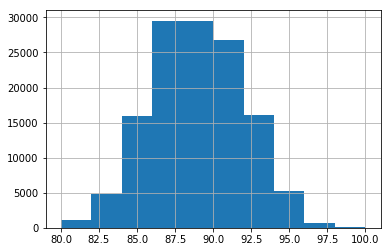

In [24]:
wine_data['points'].hist()

删除Price缺失值前的数据可视化

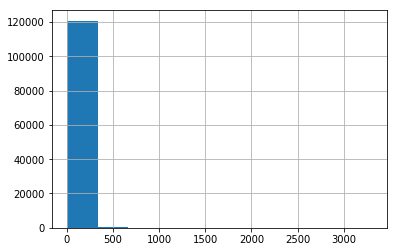

In [25]:
wine_data['price'].hist()

#### 3.4.2.1 剔除缺失部分

In [26]:
del_wine = wine_data.dropna()

删除Points缺失值后的数据可视化

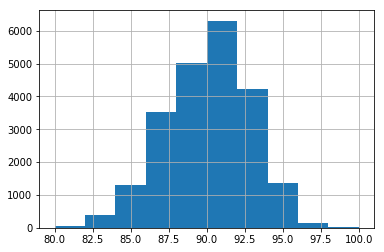

In [27]:
del_wine['points'].hist()

删除Price缺失值后的数据可视化

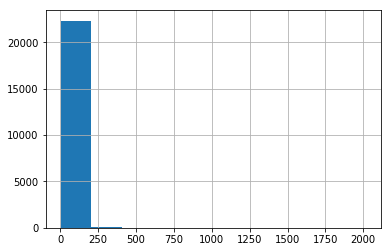

In [28]:
del_wine['price'].hist()

#### 3.4.2.2 用最高频率值来填补缺失值

In [29]:
fill_data = wine_data.fillna({'points': wine_data['points'].mode().item(), 'price': wine_data['price'].mode().item()})

填充Price缺失值后的数据可视化

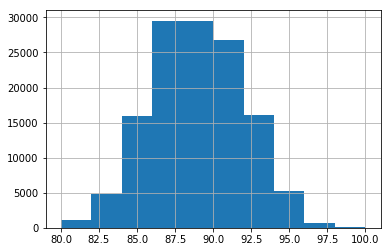

In [30]:
fill_data['points'].hist()

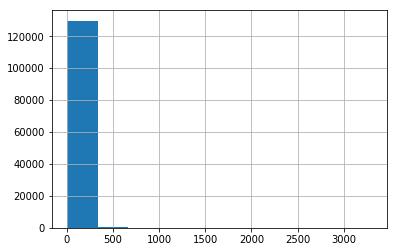

In [31]:
fill_data['price'].hist()

#### 3.4.2.3 通过属性的相关关系来填补缺失值

第一步，计算属性间的相关系数。

In [32]:
x = wine_data.corr()
print(x)

          points     price
points  1.000000  0.416167
price   0.416167  1.000000


Points没有缺失数据，可根据已有的Points和Price数据，得到它们的回归方程，利用回归方程计算缺失值。

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002AE108E7160>,
      dtype=object)

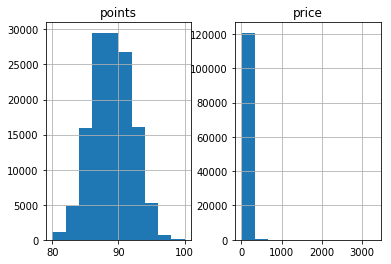

In [33]:
points = wine_data['points']
price = wine_data['price']
model = sm.OLS(price,points).fit()
new_data = wine_data
for i in range(len(new_data)):
    if(np.isnan(new_data['price'][i])):
        new_data.loc[i,'price'] = model.predict(new_data['points'][i])
number_data = ['points','price']
new_data.hist()

In [34]:
new_data[number_data].describe()

,points,price
count,129971.000000,120975.000000
mean,88.447138,35.363389
std,3.039730,41.022218
min,80.000000,4.000000
25%,86.000000,17.000000
50%,88.000000,25.000000
75%,91.000000,42.000000
max,100.000000,3300.000000


利用属性相关关系填充后，Price的均值和标准差发生了细微的变化。

#### 3.4.2.4 通过数据对象之间的相似性来填补缺失值

根据对象之间Points的相似性，来填充缺失的Price：

In [35]:
sim_data = wine_data[['price','points']]
p = {}
for row in sim_data.iterrows():
    if p.get(row[1]['points'], None):
        if not np.isnan(row[1]['price']):
            p[row[1]['points']][0] += row[1]['price']
            p[row[1]['points']][1] += 1
    else:
        if not np.isnan(row[1]['price']):
            p[row[1]['points']] = [row[1]['price'], 1]
for k in p.keys():
    p[k][0] = round(p[k][0] / p[k][1], 4)
for i in range(len(sim_data['price'])):
    if (np.isnan(sim_data['price'][i])):
        da = p[sim_data.loc[i, 'points']][0]
        sim_data.loc[i, 'price']  = da

D:\tools\Anaconda\lib\site-packages\pandas\core\indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


In [36]:
number_data = ['points','price']
sim_data[number_data].describe()

,points,price
count,129971.000000,129971.000000
mean,88.447138,35.490964
std,3.039730,40.022681
min,80.000000,4.000000
25%,86.000000,18.000000
50%,88.000000,26.000000
75%,91.000000,42.000000
max,100.000000,3300.000000


可以观察到，在填充后，数值数据Price的标准差、均值、Q1和中位数发生了变化。

### 3.4.3 部分标称数据的缺失处理

进行Country的缺失处理，由于缺失的Country记录只占了很小一部分，所以剔除缺少Country值的63条记录，不会影响结果。

In [37]:
# 查找缺失的Country列数据
wine_data[wine_data.country.isnull()]

,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery
913,NaN,"Amber in color, this wine has aromas of peach ...",Asureti Valley,87,30.0,NaN,NaN,NaN,Mike DeSimone,@worldwineguys,Gotsa Family Wines 2014 Asureti Valley Chinuri,Chinuri,Gotsa Family Wines
3131,NaN,"Soft, fruity and juicy, this is a pleasant, si...",Partager,83,NaN,NaN,NaN,NaN,Roger Voss,@vossroger,Barton & Guestier NV Partager Red,Red Blend,Barton & Guestier
4243,NaN,"Violet-red in color, this semisweet wine has a...",Red Naturally Semi-Sweet,88,18.0,NaN,NaN,NaN,Mike DeSimone,@worldwineguys,Kakhetia Traditional Winemaking 2012 Red Natur...,Ojaleshi,Kakhetia Traditional Winemaking
9509,NaN,This mouthwatering blend starts with a nose of...,Theopetra Malagouzia-Assyrtiko,92,28.0,NaN,NaN,NaN,Susan Kostrzewa,@suskostrzewa,Tsililis 2015 Theopetra Malagouzia-Assyrtiko W...,White Blend,Tsililis
9750,NaN,This orange-style wine has a cloudy yellow-gol...,Orange Nikolaevo Vineyard,89,28.0,NaN,NaN,NaN,Jeff Jenssen,@worldwineguys,Ross-idi 2015 Orange Nikolaevo Vineyard Chardo...,Chardonnay,Ross-idi
11150,NaN,"A blend of 85% Melnik, 10% Grenache Noir and 5...",NaN,89,20.0,NaN,NaN,NaN,Jeff Jenssen,@worldwineguys,Orbelus 2013 Melnik,Melnik,Orbelus
11348,NaN,"Light and fruity, this is a wine that has some...",Partager,82,NaN,NaN,NaN,NaN,Roger Voss,@vossroger,Barton & Guestier NV Partager White,White Blend,Barton & Guestier
14030,NaN,"This Furmint, grown in marl soils, has aromas ...",Márga,88,25.0,NaN,NaN,NaN,Jeff Jenssen,@worldwineguys,St. Donat 2013 Márga White,White Blend,St. Donat
16000,NaN,"Jumpy, jammy aromas of foxy black fruits are s...",Valle de los Manantiales Vineyard,86,40.0,NaN,NaN,NaN,Michael Schachner,@wineschach,Familia Deicas 2015 Valle de los Manantiales V...,Tannat,Familia Deicas
16749,NaN,Winemaker: Bartho Eksteen. This wooded Sauvy s...,Cape Winemakers Guild Vloekskoot Wooded,91,NaN,NaN,NaN,NaN,Lauren Buzzeo,@laurbuzz,Bartho Eksteen 2016 Cape Winemakers Guild Vloe...,Sauvignon Blanc,Bartho Eksteen


In [38]:
wine_data.shape

(129971, 13)

剔除Country中的空值，更新数据

In [39]:
loss_country_data = wine_data.dropna(how="any", subset=["country"])

In [40]:
loss_country_data.shape

(129908, 13)

In [41]:
loss_country_data[loss_country_data.country.isnull()]

,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery


可以看到，Country的缺失值已不存在，同理，其他的标称数据也可以做类似处理。